In [36]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib


# Read the CSV and Perform Basic Data Cleaning

In [37]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [39]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [40]:
X = selected_features
y = df[['koi_disposition']]
print(X.shape, y.shape)

(6991, 40) (6991, 1)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [41]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [30]:
len(X_train)

5243

In [42]:
len(y_test)

1748

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical # type: ignore

In [47]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Step 1: Label-encode the data set
label_encoder = LabelEncoder()

encoded_y_train = label_encoder.fit_transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

/Users/moz/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/moz/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [49]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model



In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
#Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=40))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [68]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
### END SOLUTION

In [77]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [78]:
label_encoder = LabelEncoder()
partial_y_train_encoded = label_encoder.fit_transform(partial_y_train)


/Users/moz/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
partial_y_train_categorical = to_categorical(partial_y_train_encoded, num_classes=3)


In [85]:
history = model.fit(
    partial_x_train,
    partial_y_train_categorical,
    epochs=11,
    batch_size=512,
    validation_data=(x_val, to_categorical(label_encoder.transform(y_val), num_classes=3))
)

Epoch 1/11


/Users/moz/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


9/9 [==============================] - 0s 15ms/step - loss: 288.2515 - accuracy: 0.6651 - val_loss: 416.2942 - val_accuracy: 0.6090
Epoch 2/11
9/9 [==============================] - 0s 7ms/step - loss: 273.6450 - accuracy: 0.6413 - val_loss: 534.6579 - val_accuracy: 0.6190
Epoch 3/11
9/9 [==============================] - 0s 7ms/step - loss: 581.6685 - accuracy: 0.6213 - val_loss: 1360.0959 - val_accuracy: 0.5730
Epoch 4/11
9/9 [==============================] - 0s 7ms/step - loss: 546.8049 - accuracy: 0.6347 - val_loss: 727.4196 - val_accuracy: 0.5930
Epoch 5/11
9/9 [==============================] - 0s 6ms/step - loss: 460.7724 - accuracy: 0.5927 - val_loss: 3663.8491 - val_accuracy: 0.5760
Epoch 6/11
9/9 [==============================] - 0s 5ms/step - loss: 3133.3564 - accuracy: 0.5704 - val_loss: 6658.6133 - val_accuracy: 0.5710
Epoch 7/11
9/9 [==============================] - 0s 5ms/step - loss: 3485.8682 - accuracy: 0.5663 - val_loss: 6080.3989 - val_accuracy: 0.5170
Epoch 8/11

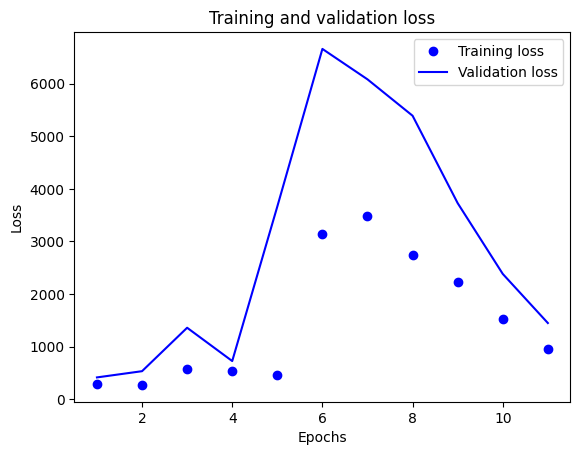

In [86]:
import matplotlib.pyplot as plt

# Assuming history contains the training history
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
# model.summary()x

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               4100      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 3)                 303       
                                                                 
Total params: 14503 (56.65 KB)
Trainable params: 14503 (56.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model.fit(
#     X_train_scaled,
#     y_train_categorical,
#     epochs=40,
#     shuffle=True,
#     verbose=2
# )

Epoch 1/40
164/164 - 3s - loss: 0.5414 - accuracy: 0.7366 - 3s/epoch - 18ms/step
Epoch 2/40
164/164 - 0s - loss: 0.3803 - accuracy: 0.8058 - 183ms/epoch - 1ms/step
Epoch 3/40
164/164 - 0s - loss: 0.3610 - accuracy: 0.8152 - 182ms/epoch - 1ms/step
Epoch 4/40
164/164 - 0s - loss: 0.3512 - accuracy: 0.8264 - 174ms/epoch - 1ms/step
Epoch 5/40
164/164 - 0s - loss: 0.3533 - accuracy: 0.8213 - 175ms/epoch - 1ms/step
Epoch 6/40
164/164 - 0s - loss: 0.3415 - accuracy: 0.8346 - 171ms/epoch - 1ms/step
Epoch 7/40
164/164 - 0s - loss: 0.3332 - accuracy: 0.8421 - 161ms/epoch - 980us/step
Epoch 8/40
164/164 - 0s - loss: 0.3315 - accuracy: 0.8417 - 166ms/epoch - 1ms/step
Epoch 9/40
164/164 - 0s - loss: 0.3215 - accuracy: 0.8503 - 165ms/epoch - 1ms/step
Epoch 10/40
164/164 - 0s - loss: 0.3207 - accuracy: 0.8543 - 179ms/epoch - 1ms/step
Epoch 11/40
164/164 - 0s - loss: 0.3145 - accuracy: 0.8547 - 238ms/epoch - 1ms/step
Epoch 12/40
164/164 - 0s - loss: 0.3206 - accuracy: 0.8558 - 161ms/epoch - 983us/step

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.2358 - accuracy: 0.9016 - 319ms/epoch - 6ms/step
Normal Neural Network - Loss: 0.23578858375549316, Accuracy: 0.9016018509864807


# Save the Model

In [ ]:
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_1.sav'
joblib.dump(model_1, filename)